In [47]:
url='https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve

In [48]:
urlretrieve(url,"medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x206993a0b30>)

In [49]:
import pandas as pd

In [50]:
medicalpdf= pd.read_csv("medical.csv")
medicalpdf


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [51]:
medicalpdf.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [52]:

import plotly.express as xp # type: ignore
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore
%matplotlib inline
import numpy as np

In [53]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.facecolor']='#00000000'
matplotlib.rcParams['figure.figsize']=(11,6)

In [54]:
medicalpdf.age.describe()
medicalpdf.age.max()-medicalpdf.age.min()+1

np.int64(47)

In [55]:
fig=xp.histogram(medicalpdf,
    x='age',
    marginal='box',
    nbins=47,
    title='age distribution'
)
fig.update_layout(bargap=0.5)
fig.show()

In [56]:
fig=xp.histogram(medicalpdf, 
                    x='bmi',
                    marginal='box',
                    color_discrete_sequence=['green'],
                    title="BMI")
fig.update_layout(bargap=0.2)
fig.show()


In [57]:
fig=xp.histogram(medicalpdf,
                 x='charges',
                 color='sex',
                 color_discrete_sequence=['grey','black','green'],
                 title='CHARGE')
fig.update_layout(bargap=0.1)
fig.show()

In [58]:
medicalpdf.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [59]:
fig=xp.histogram( medicalpdf, x="smoker",color="sex",color_discrete_sequence=['blue','black'],title="somkers lol")
fig.update_layout(bargap=0.1)
fig.show()

In [60]:
fig= xp.scatter(medicalpdf,x='age',y='charges',color='smoker',hover_data=['sex','bmi'],opacity=0.8,title="SCATTER EVERYONE")
fig.update_traces(marker_size=5)
fig.show()

In [61]:
non_smokers=medicalpdf[medicalpdf.smoker== 'no']
fig=xp.scatter(non_smokers,x='age',y='charges',opacity=0.8,title="age vs charges")
fig.show()

In [62]:
def estimate(age,w,b):
    return w*age + b



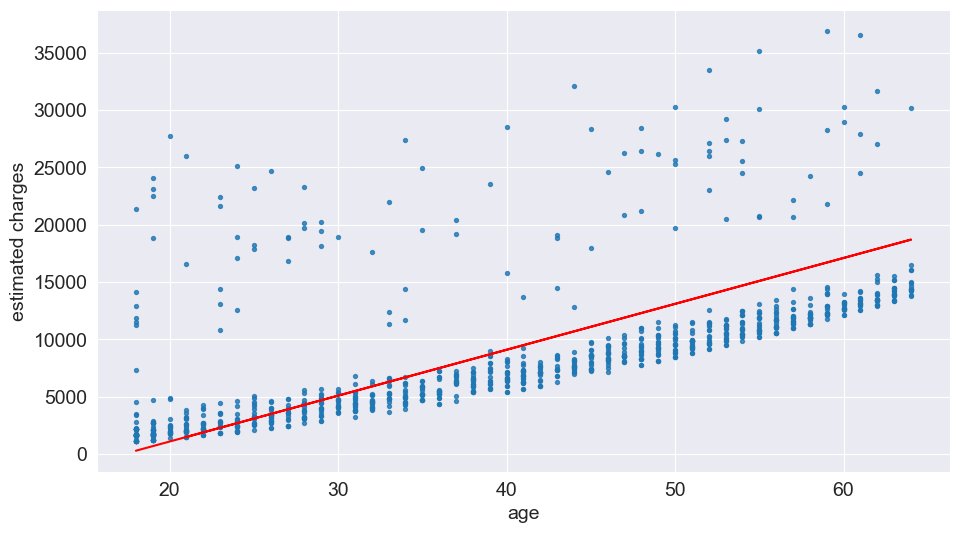

In [63]:
w=400
b=-6900
ages=non_smokers.age
chargess=non_smokers.charges
estimate_charges=estimate(ages,w,b)
plt.scatter(ages,chargess,s=8,alpha=0.8);
plt.plot(ages,estimate_charges,'r-');
plt.xlabel('age');
plt.ylabel('estimated charges');



In [64]:
residue=chargess-estimate_charges
estimate_charges


1         300
2        4300
3        6300
4        5900
5        5500
        ...  
1332    13900
1333    13100
1334      300
1335      300
1336     1500
Name: age, Length: 1064, dtype: int64

In [65]:
def rmse(a,b):
    return np.sqrt(np.mean(np.square(a-b)))

In [66]:
rmse(chargess,estimate_charges)

np.float64(5040.567676244465)

In [67]:
%pip install scikit-learn --quiet 


^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor # type: ignore

In [ ]:
model=LinearRegression()
model2=SGDRegressor()

In [ ]:
inputs=non_smokers[['age']]
targets=non_smokers.charges
print(inputs.shape)
print(targets.shape)

(1064, 1)
(1064,)


In [ ]:
model.fit(inputs,targets)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [ ]:
model.predict(np.array([[23],[37],[60]]))

c:\Users\Sakth\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 13943.51421331])

In [ ]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [ ]:
from sklearn.metrics import mean_squared_error


np.float64(4662.505766636395)

In [68]:
mse=mean_squared_error(targets,predictions)
rmse=np.sqrt(mse)
rmse

np.float64(4662.505766636395)

In [ ]:
model.coef_


np.float64(-2091.4205565650864)

In [72]:
model.intercept_

np.float64(-2091.4205565650864)